## IMPORTING LIBRARIES

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Setting seaborn style for better aesthetics
sns.set_style("whitegrid")
# Setting color palette
sns.set_palette("Set2")
# Setting font scale for better readability
sns.set_context("notebook", font_scale=1.3)

## LOADING AND VIEWING DATA SET

In [7]:
RoadAccidentsData = pd.read_csv(
    "CSV Files/Road Accidents.csv",
    dtype={
        "Latitude":"str",
        "Longitude":"str"
    }
)

In [8]:
RoadAccidentsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307972 entries, 0 to 307971
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Accident Index           307972 non-null  object
 1   Date                     307972 non-null  object
 2   Junction Control         307972 non-null  object
 3   Junction Detail          307972 non-null  object
 4   Accident Severity        307972 non-null  object
 5   Latitude                 307972 non-null  object
 6   Light Conditions         307972 non-null  object
 7   District                 307972 non-null  object
 8   Carriageway Hazards      5424 non-null    object
 9   Longitude                307972 non-null  object
 10  No of Casualties         307972 non-null  int64 
 11  No of Vehicles           307972 non-null  int64 
 12  Police Force             307972 non-null  object
 13  Road Surface Conditions  307655 non-null  object
 14  Road Type           

## DATA CLEANING

#### DATE COLUMN

In [9]:
# Fixing date column by parsing it to datetime format
RoadAccidentsData["Date"] = pd.to_datetime(RoadAccidentsData["Date"])

#### FIXING NAMING ERRORS

In [10]:
# Replacing "Fetal" with "Fatal" in the "Accident Severity" column
RoadAccidentsData["Accident Severity"] = RoadAccidentsData["Accident Severity"].replace("Fetal", "Fatal")

#### HANDLING COLUMNS WITH MISSING VALUES

In [11]:
## Checking for missing values
RoadAccidentsData.isnull().sum()

Accident Index                  0
Date                            0
Junction Control                0
Junction Detail                 0
Accident Severity               0
Latitude                        0
Light Conditions                0
District                        0
Carriageway Hazards        302548
Longitude                       0
No of Casualties                0
No of Vehicles                  0
Police Force                    0
Road Surface Conditions       317
Road Type                    1534
Speed limit                     0
Time                           17
Area                            0
Weather Conditions           6057
Vehicle Type                    0
dtype: int64

##### 1. DROPPING CARRIAGEWAY HAZARDS COLUMNS - OVER 300,000 EMPTY ROWS

In [12]:
# Dropping carriageway hazards column due to high number of missing values
RoadAccidentsData = RoadAccidentsData.drop(columns=["Carriageway Hazards"])

##### 2. ROAD SURFACE CONDITIONS COLUMN - Replacing the missing values with "Not Mentioned"

In [13]:
# ["Road Surface Conditions"] columns missing values handling
RoadAccidentsData["Road Surface Conditions"].isnull().sum()

# Replacing the missing values with "Not Mentioned"
##RoadAccidentsData["Road Surface Conditions"].fillna("Not Mentioned", inplace=True)

RoadAccidentsData["Road Surface Conditions"] = RoadAccidentsData["Road Surface Conditions"].fillna("Not Mentioned")

##### 3. ROAD TYPE COLUMN -  Replacing missing values with "Unknown"

In [14]:
# ["Road Type"] column missing values handling

# Counting number of missing values in the column
RoadAccidentsData["Road Type"].isnull().sum() # Returns 1,534

# Replacing missing values with "Unknown"
RoadAccidentsData["Road Type"] = RoadAccidentsData["Road Type"].fillna("Unknown")

##### 4. TIME COLUMN - Removed the rows with missing values (17)

In [15]:
# Handling missing values in the ["Time"] column

# Counting number of missing values in the column
RoadAccidentsData["Time"].isnull().sum() # Returns 17

np.int64(17)

In [16]:
# 17 missing values, which is a very small number, I can safely remove the rows since they don't represent a significant portion of the total dataset.

# Drop rows where the 'Time' column is NaN
RoadAccidentsData.dropna(subset=["Time"], inplace=True)

In [17]:
# Fixing the ["Time"] column by parsing datetime format
# Specify the format to avoid UserWarning
RoadAccidentsData["Time"] = pd.to_datetime(RoadAccidentsData["Time"], format="%H:%M", errors="coerce").dt.time

##### 5. WEATHER CONDITIONS COLUMN - Replacing the missing values with "Unknown"

In [18]:
# Counting number of missing values in the ["Weather Conditions"] column
RoadAccidentsData["Weather Conditions"].isnull().sum() # Returns 6,057

# Replacing the missing values with "Unknown"
RoadAccidentsData["Weather Conditions"] = RoadAccidentsData["Weather Conditions"].fillna("Unknown")

##### 6. ADDING YEAR, MONTH & DAY COLUMNS

In [19]:
# Adding extra columns for beter analysis ["Year", "Month Name", "Day of Week"]
RoadAccidentsData["Year"] = RoadAccidentsData["Date"].dt.year
RoadAccidentsData["Month"] = RoadAccidentsData["Date"].dt.month_name()
RoadAccidentsData["Day of Week"] = RoadAccidentsData["Date"].dt.day_name()

##### 7. DROPPING DUPLICATES

In [20]:
# Dropping duplicates rows if any
RoadAccidentsData = RoadAccidentsData.drop_duplicates()

### CLEANED DATASET

In [21]:
RoadAccidentsData

,Accident Index,Date,Junction Control,Junction Detail,Accident Severity,Latitude,Light Conditions,District,Longitude,No of Casualties,...,Road Surface Conditions,Road Type,Speed limit,Time,Area,Weather Conditions,Vehicle Type,Year,Month,Day of Week
0,200901BS70001,2021-01-01,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,-0.201349,1,...,Dry,One way street,30,15:11:00,Urban,Fine no high winds,Car,2021,January,Friday
1,200901BS70006,2021-01-01,Give way or uncontrolled,T or staggered junction,Slight,51.493415,Daylight,Kensington and Chelsea,-0.185525,3,...,Dry,Single carriageway,30,11:48:00,Urban,Fine no high winds,Car,2021,January,Friday
2,200901CW10175,2021-01-01,Auto traffic signal,Crossroads,Serious,51.523932,Darkness - lights lit,Westminster,-0.15303,1,...,Dry,Single carriageway,30,17:30:00,Urban,Fine no high winds,Motorcycle over 500cc,2021,January,Friday
3,200901CW12278,2021-01-01,Auto traffic signal,Crossroads,Slight,51.514015,Daylight,Westminster,-0.151413,2,...,Wet or damp,Single carriageway,30,09:01:00,Urban,Raining no high winds,Car,2021,January,Friday
4,200901EK76923,2021-01-01,Data missing or out of range,Not at junction or within 20 metres,Serious,51.543017,Daylight,Camden,-0.137258,1,...,Dry,Dual carriageway,30,05:29:00,Urban,Fine no high winds,Car,2021,January,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307967,2010550D56893,2022-12-31,Give way or uncontrolled,T or staggered junction,Slight,50.857112,Darkness - lights lit,North Dorset,-2.165059,1,...,Dry,Single carriageway,30,20:40:00,Rural,Fine no high winds,Car,2022,December,Saturday
307968,201060L239013,2022-12-31,Auto traffic signal,T or staggered junction,Slight,53.071825,Darkness - lights lit,Wrexham,-3.019392,4,...,Wet or damp,Dual carriageway,30,18:25:00,Urban,Fine no high winds,Car,2022,December,Saturday
307969,2.01E+12,2022-12-31,Give way or uncontrolled,Roundabout,Slight,51.574445,Daylight,Newport,-2.984536,1,...,Dry,Roundabout,50,13:51:00,Urban,Fine no high winds,Car,2022,December,Saturday
307970,2.01E+12,2022-12-31,Give way or uncontrolled,Other junction,Slight,51.682244,Daylight,"Rhondda, Cynon, Taff",-3.379017,1,...,Dry,Single carriageway,30,10:00:00,Urban,Fine no high winds,Car,2022,December,Saturday


In [22]:
# Confirming changes to the dataset
RoadAccidentsData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307955 entries, 0 to 307971
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Accident Index           307955 non-null  object        
 1   Date                     307955 non-null  datetime64[ns]
 2   Junction Control         307955 non-null  object        
 3   Junction Detail          307955 non-null  object        
 4   Accident Severity        307955 non-null  object        
 5   Latitude                 307955 non-null  object        
 6   Light Conditions         307955 non-null  object        
 7   District                 307955 non-null  object        
 8   Longitude                307955 non-null  object        
 9   No of Casualties         307955 non-null  int64         
 10  No of Vehicles           307955 non-null  int64         
 11  Police Force             307955 non-null  object        
 12  Road Surface Conditio

## ANALYSIS AND VISUALIZATION

### UNIVARIATE ANALYSIS

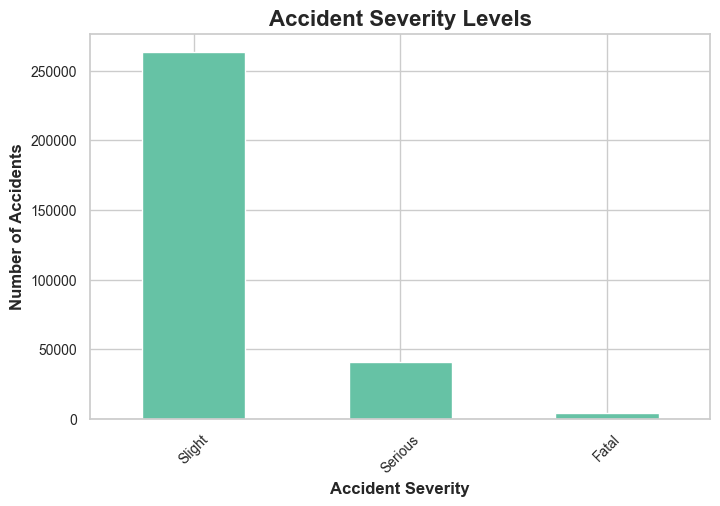

In [23]:
# Accident Severity Analysis
AccidentsSeverity = RoadAccidentsData["Accident Severity"].value_counts()
AccidentsSeverity.plot(kind="bar", figsize=(8,5))
plt.title("Accident Severity Levels", fontsize=16, fontweight="bold")
plt.xlabel("Accident Severity", fontweight="bold", fontsize=12)
plt.ylabel("Number of Accidents", fontweight="bold", fontsize=12)
plt.xticks(rotation=45,fontsize=10)
plt.yticks(fontsize=10)
plt.show()

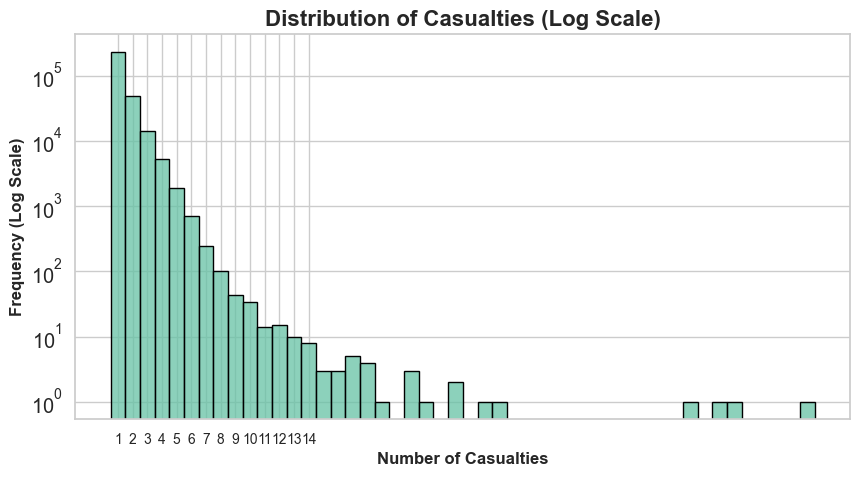

In [24]:
# Examine how many casualties typically occur per accident using histogram
plt.figure(figsize=(10, 5))

sns.histplot(
    RoadAccidentsData["No of Casualties"],
    # Keep the bins small for better detail, maybe up to 10
    bins=range(1, 15), # Use integer bins
    kde=False, # KDE can look strange on a log scale
    edgecolor="black",
    discrete=True
)

# Apply the Logarithmic Scale to the Y-axis
plt.yscale('log')

plt.title("Distribution of Casualties (Log Scale)", fontsize=16, fontweight="bold")
plt.xlabel("Number of Casualties", fontweight="bold", fontsize=12)
plt.ylabel("Frequency (Log Scale)", fontweight="bold", fontsize=12)
plt.xticks(range(1, 15), fontsize=10) # Set readable x-ticks

plt.show()

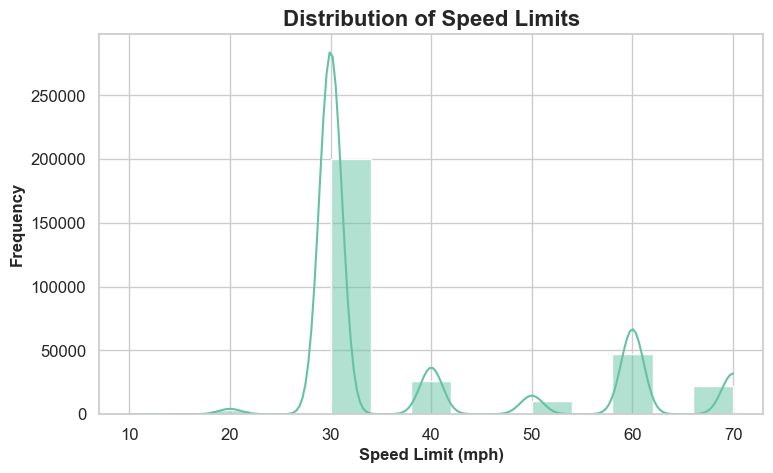

In [25]:
# Distribution of Speed Limit
plt.figure(figsize=(8,5))
sns.histplot(data=RoadAccidentsData, x='Speed limit', bins=15, kde=True)
plt.title('Distribution of Speed Limits', fontweight="bold", fontsize=16)
plt.xlabel('Speed Limit (mph)', fontweight="bold", fontsize=12)
plt.ylabel('Frequency', fontweight="bold", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

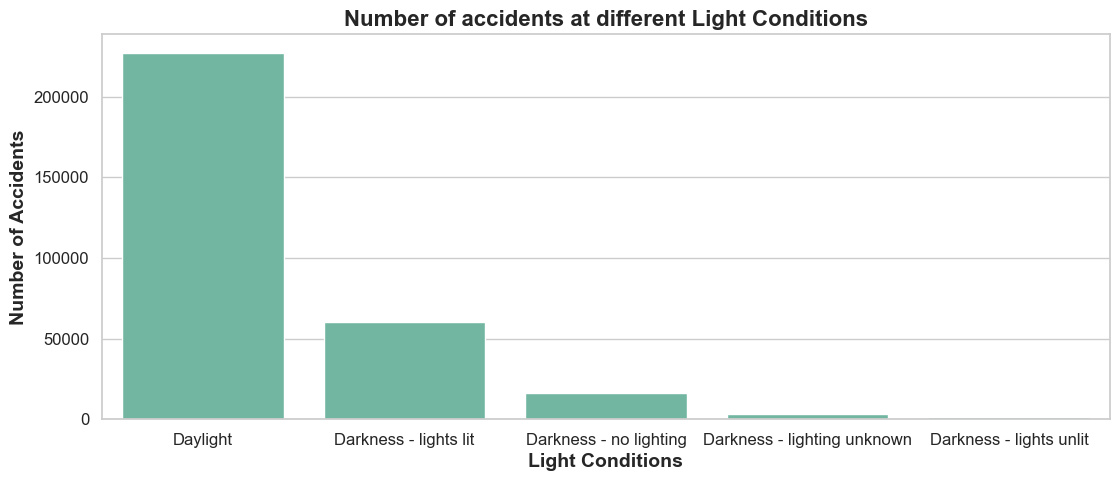

In [26]:
# Number of accidents by light conditions
WeatherConditions = RoadAccidentsData["Light Conditions"].value_counts()
plt.figure(figsize=(13,5))
sns.barplot(
    x=WeatherConditions.index,
    y=WeatherConditions.values
)
plt.title("Number of accidents at different Light Conditions", fontsize=16, fontweight="bold")
plt.xlabel("Light Conditions", fontweight="bold", fontsize=14)
plt.ylabel("Number of Accidents", fontweight="bold", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

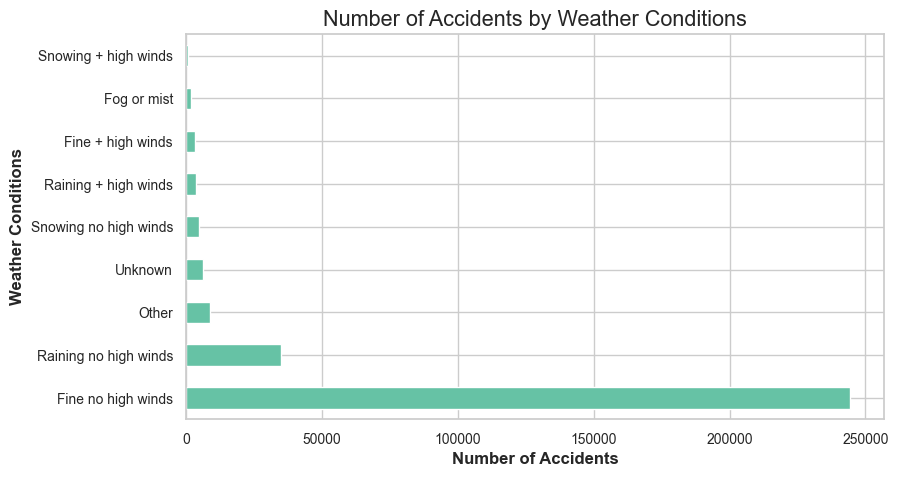

In [27]:
# Distribution of Weather Conditions
WeatherConditionsAccidents = RoadAccidentsData["Weather Conditions"].value_counts().sort_values(ascending=False)
WeatherConditionsAccidents.plot(kind="barh", figsize=(9,5), title="Number of Accidents by Weather Conditions")
plt.xlabel("Number of Accidents", fontsize=12, fontweight="bold")
plt.ylabel("Weather Conditions", fontsize=12, fontweight="bold")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

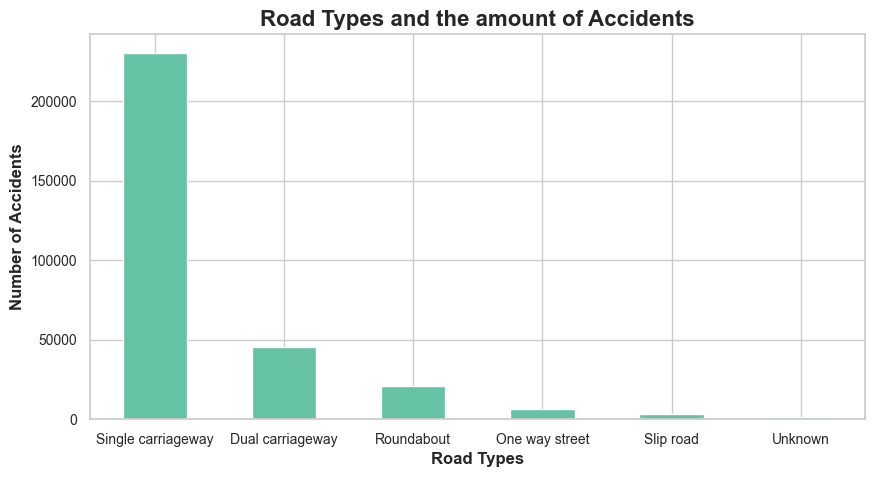

In [28]:
# Road Types with the most Accidents
RoadTypeAccidents = RoadAccidentsData["Road Type"].value_counts().sort_values(ascending=False)

RoadTypeAccidents.plot(kind="bar", figsize=(10,5))
plt.title("Road Types and the amount of Accidents", fontsize=16, fontweight="bold")
plt.xlabel("Road Types", fontsize=12, fontweight="bold")
plt.ylabel("Number of Accidents", fontsize=12, fontweight="bold")
plt.xticks(rotation=360,fontsize=10)
plt.yticks(fontsize=10)

plt.show()

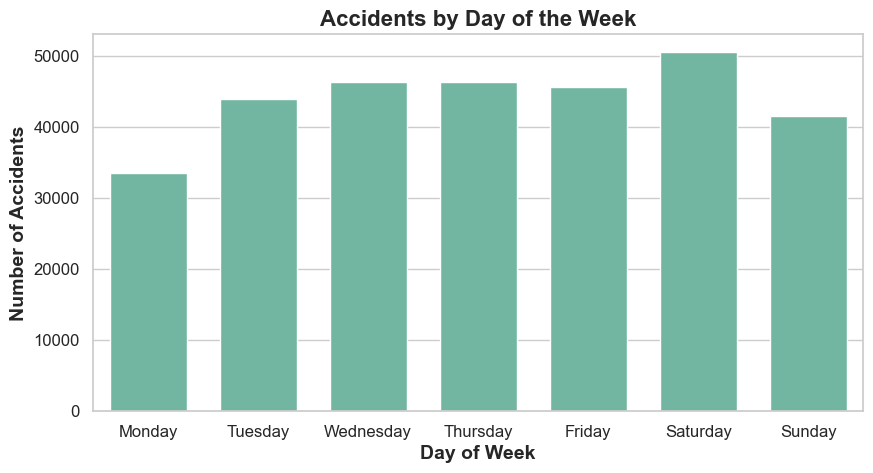

In [29]:
# Distribution of Day of the Week
plt.figure(figsize=(9,5))
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(data=RoadAccidentsData, x='Day of Week', order=order, width=0.7)
plt.title('Accidents by Day of the Week', fontweight="bold", fontsize=16)
plt.xlabel('Day of Week', fontweight="bold", fontsize=14)
plt.ylabel('Number of Accidents', fontweight="bold", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

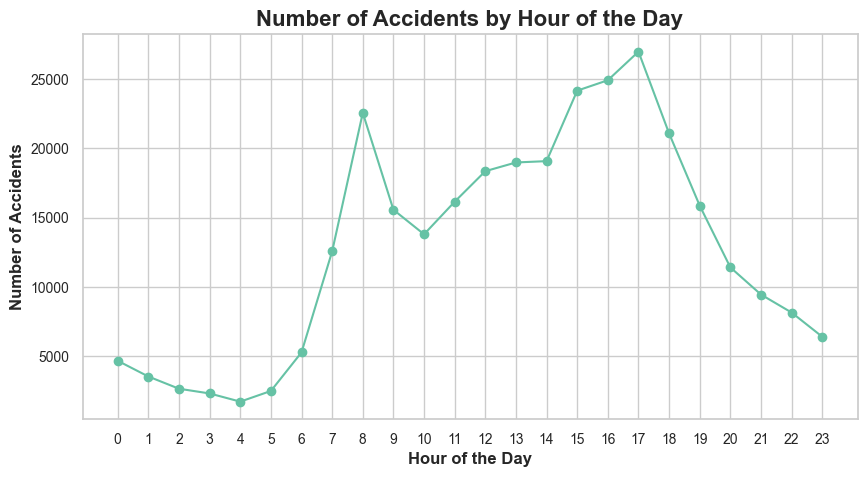

In [30]:
# What time of the day do most accidents occur using the Time column
RoadAccidentsData["Hour"] = RoadAccidentsData["Time"].apply(lambda t: t.hour if pd.notnull(t) else np.nan)
HourlyAccidents = RoadAccidentsData["Hour"].value_counts().sort_index()

HourlyAccidents.plot(kind="line", figsize=(10,5), marker='o')
plt.title("Number of Accidents by Hour of the Day", fontsize=16, fontweight="bold")
plt.xlabel("Hour of the Day", fontsize=12, fontweight="bold")
plt.ylabel("Number of Accidents", fontsize=12, fontweight="bold")
plt.xticks(ticks=range(0, 24), labels=[str(h) for h in range(0, 24)], fontsize=10)  # Show all hours 0-23
plt.yticks(fontsize=10)

plt.show()

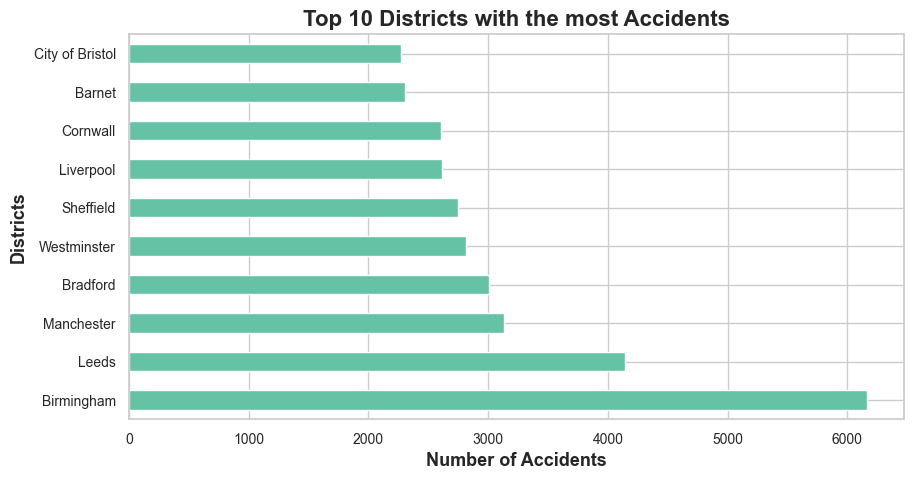

In [31]:
# Top 10 Districts with the most Accidents
AccidentsPerDistrict = RoadAccidentsData["District"].value_counts().sort_values(ascending=False).head(10)
AccidentsPerDistrict.plot(kind="barh", figsize=(10,5))

# Plotting the barh chart with titles and labels
plt.title("Top 10 Districts with the most Accidents", fontsize=16, fontweight='bold')
plt.xlabel("Number of Accidents", fontsize=13, fontweight="bold")
plt.ylabel("Districts", fontsize=13, fontweight="bold")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

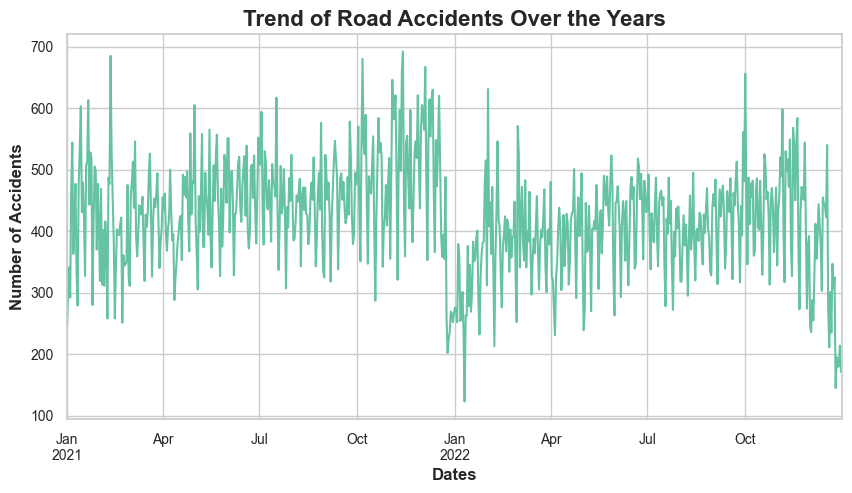

In [32]:
# Using line plot to visualize the trend of accidents over the years

# Group by date and count the number of accidents per date
AccidentsPerDate = RoadAccidentsData.groupby("Date").size()
AccidentsPerDate.plot(kind="line", figsize=(10,5))

plt.title("Trend of Road Accidents Over the Years", fontsize=16, fontweight="bold")
plt.xlabel("Dates", fontsize=12, fontweight="bold")
plt.ylabel("Number of Accidents", fontsize=12, fontweight="bold")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()


### BIVARIATE ANALYSIS

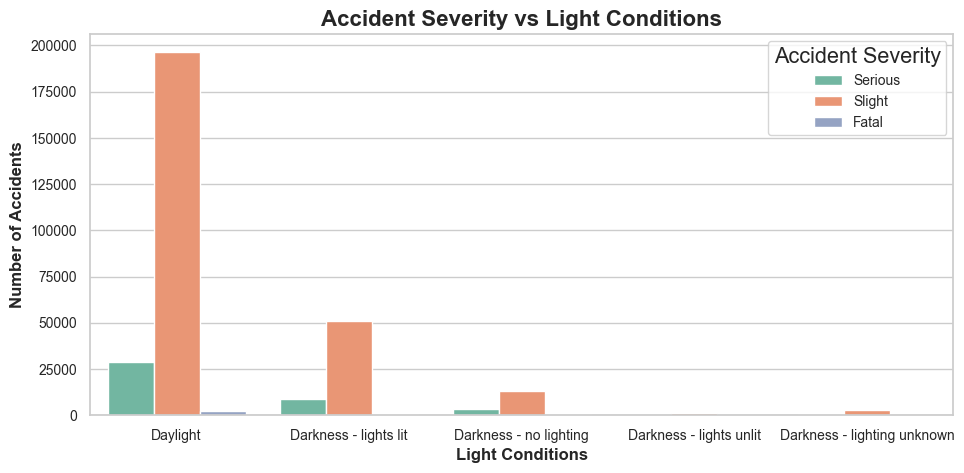

In [33]:
# 1. Accident Severity vs. Light Conditions
plt.figure(figsize=(10,5))
sns.countplot(data=RoadAccidentsData, x='Light Conditions', hue='Accident Severity')
plt.title('Accident Severity vs Light Conditions', fontsize=16, fontweight="bold")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Light Conditions', fontsize=12, fontweight="bold")
plt.ylabel('Number of Accidents', fontsize=12, fontweight="bold")
plt.legend(title="Accident Severity", fontsize=10)
plt.tight_layout()
plt.show()


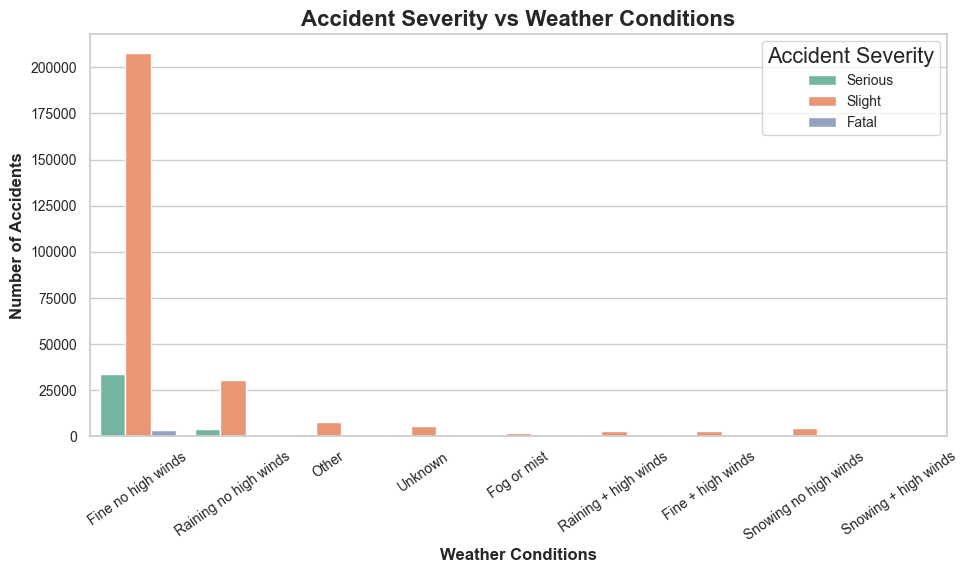

In [34]:
# 2. Accident Severity vs. Weather Conditions
plt.figure(figsize=(10,6))
sns.countplot(data=RoadAccidentsData, x='Weather Conditions', hue='Accident Severity')
plt.title('Accident Severity vs Weather Conditions', fontsize=16, fontweight="bold")
plt.xlabel('Weather Conditions', fontsize=12, fontweight="bold")
plt.ylabel('Number of Accidents', fontsize=12, fontweight="bold")
plt.xticks(rotation=35, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.legend(title="Accident Severity", fontsize=10)
plt.show()

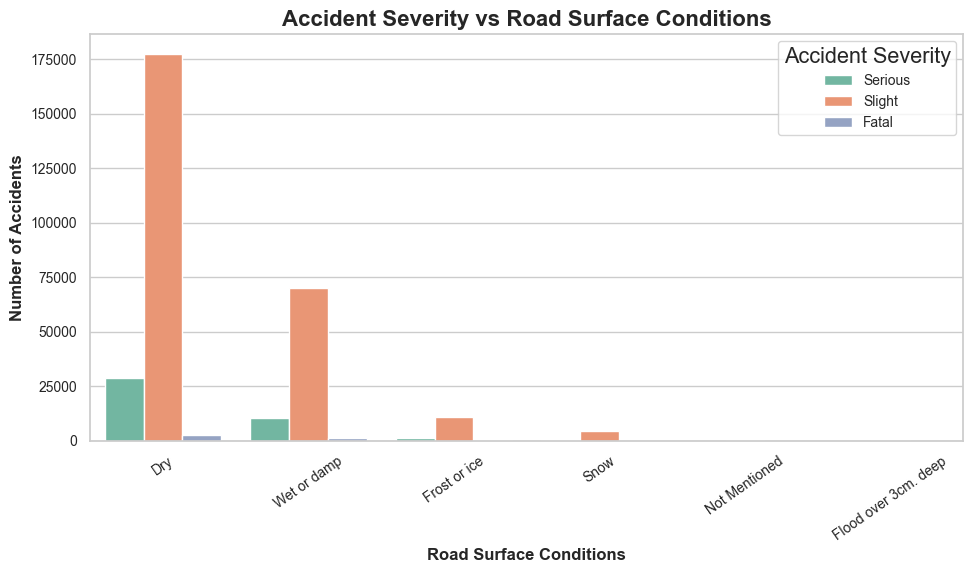

In [35]:
# 3. Accident Severity vs. Road Surface Conditions
plt.figure(figsize=(10,6))
sns.countplot(data=RoadAccidentsData, x='Road Surface Conditions', hue='Accident Severity')
plt.title('Accident Severity vs Road Surface Conditions', fontsize=16, fontweight="bold")
plt.xlabel('Road Surface Conditions', fontsize=12, fontweight="bold")
plt.ylabel('Number of Accidents', fontsize=12, fontweight="bold")
plt.xticks(rotation=35, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.legend(title="Accident Severity", fontsize=10)
plt.show()

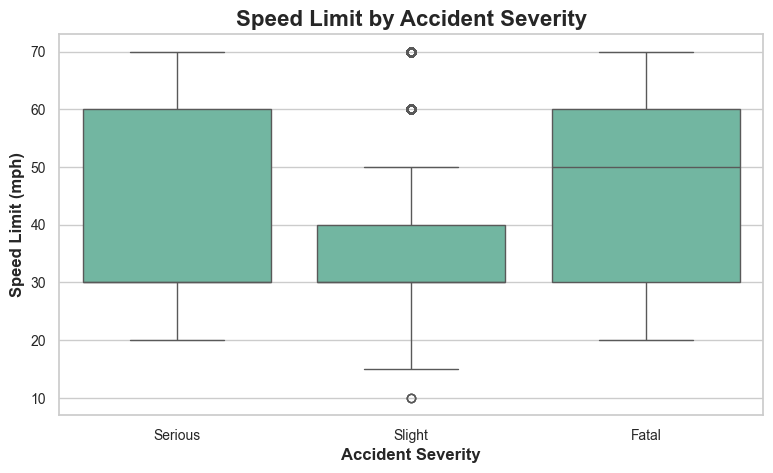

In [36]:
# Accident Severity vs. Speed Limit
plt.figure(figsize=(8,5))
sns.boxplot(data=RoadAccidentsData, x='Accident Severity', y='Speed limit')
plt.title('Speed Limit by Accident Severity', fontsize=16, fontweight="bold")
plt.xlabel('Accident Severity', fontsize=12, fontweight="bold")
plt.ylabel('Speed Limit (mph)', fontsize=12, fontweight="bold")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

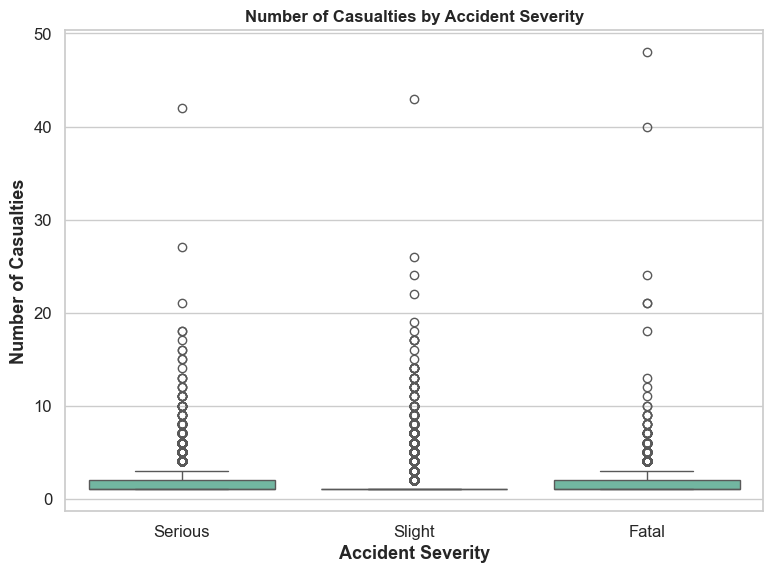

In [37]:
# 5. Number of Casualties vs. Accident Severity
plt.figure(figsize=(8,6))
sns.boxplot(data=RoadAccidentsData, x='Accident Severity', y='No of Casualties')
plt.title('Number of Casualties by Accident Severity', fontsize=12, fontweight="bold")
plt.xlabel('Accident Severity', fontsize=13, fontweight="bold")
plt.ylabel('Number of Casualties', fontsize=13, fontweight="bold")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

### MULTIVARIATE ANALYSIS

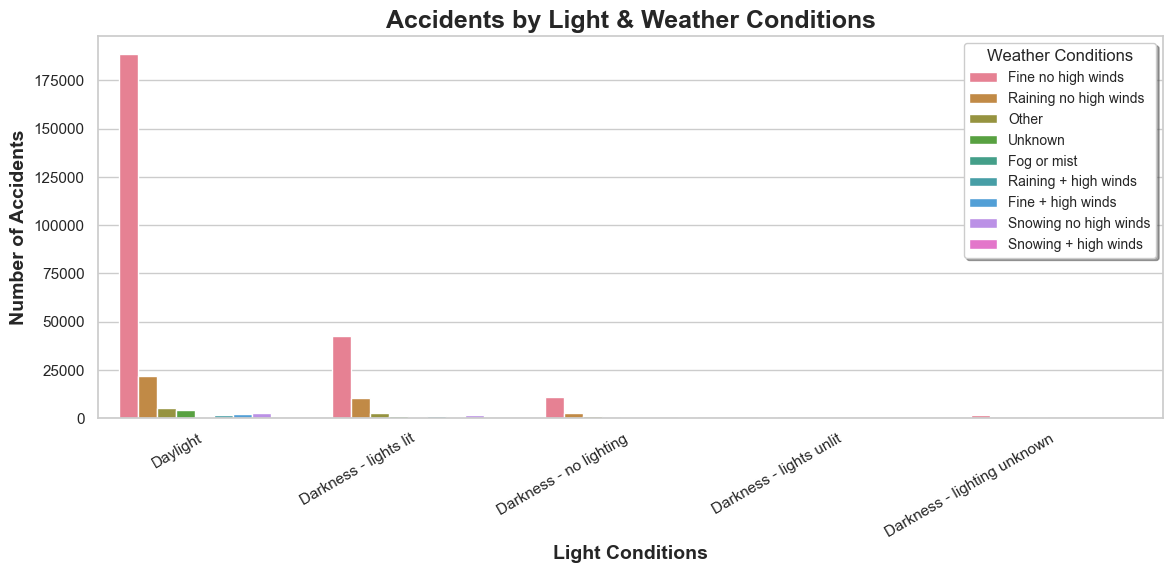

In [38]:
# Accident Severity vs. Light & Weather Conditions
plt.figure(figsize=(12, 6)) # Increase figure size for better readability
sns.countplot(data=RoadAccidentsData, x='Light Conditions', hue='Weather Conditions')
plt.title('Accidents by Light & Weather Conditions', fontsize=18, fontweight='bold')
plt.xlabel('Light Conditions', fontsize=14, fontweight='bold')
plt.ylabel('Number of Accidents', fontsize=14, fontweight='bold')
plt.xticks(rotation=30, ha='right', fontsize=11) # Rotate less, but align right (ha='right')
plt.yticks(fontsize=11)

# --- Legend Formatting ---
plt.legend(
    title='Weather Conditions',
    loc='upper right',
    fontsize=10,
    title_fontsize=12,
    frameon=True,
    shadow=True
)
# If the legend still overlaps, use the outside placement:
# plt.legend(title='Weather Conditions', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)
plt.tight_layout()
plt.show()

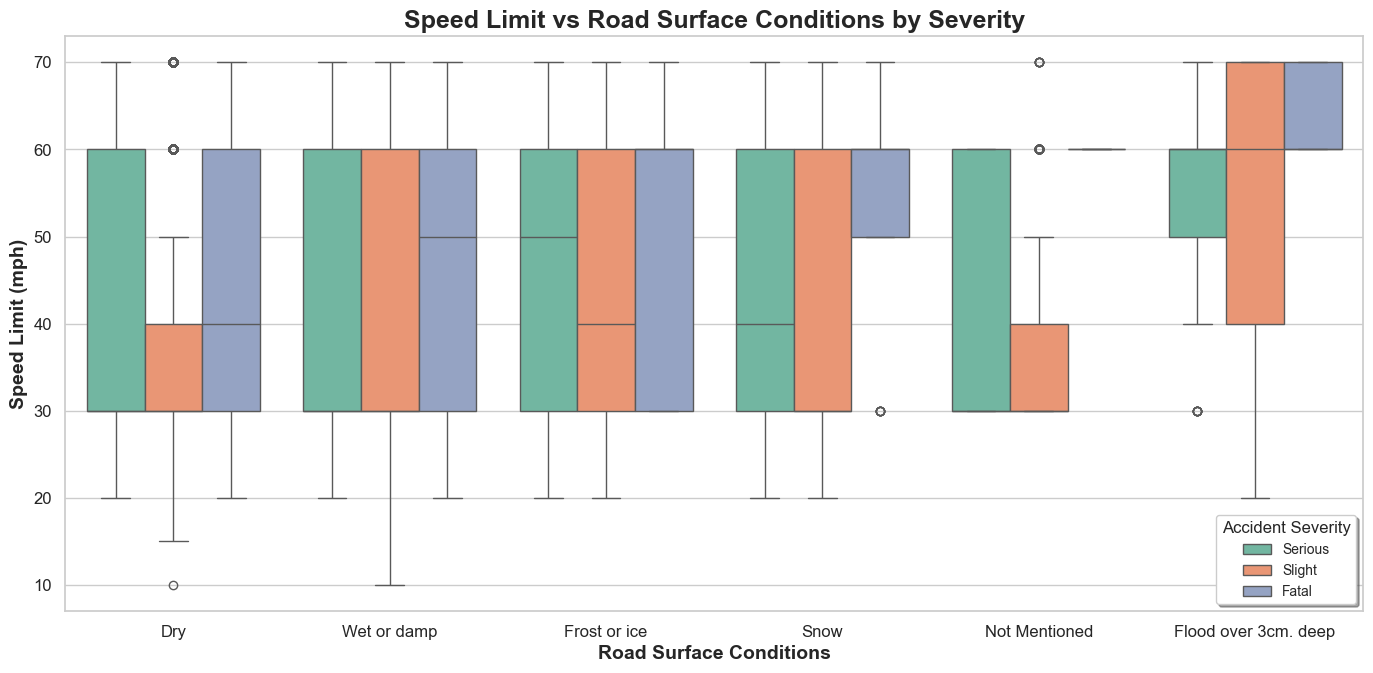

In [39]:
# Accident Severity vs. Speed Limit & Road Surface Conditions
# Examines how surface type and speed jointly influence severity.

plt.figure(figsize=(14,7))
sns.boxplot(data=RoadAccidentsData, x='Road Surface Conditions', y='Speed limit', hue='Accident Severity')
plt.title('Speed Limit vs Road Surface Conditions by Severity', fontsize=18, fontweight='bold')
plt.xlabel('Road Surface Conditions', fontsize=14, fontweight='bold')
plt.ylabel('Speed Limit (mph)', fontsize=14, fontweight='bold')
plt.legend(
    title='Accident Severity',
    loc='lower right',
    fontsize=10,
    title_fontsize=12,
    frameon=True,
    shadow=True
)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

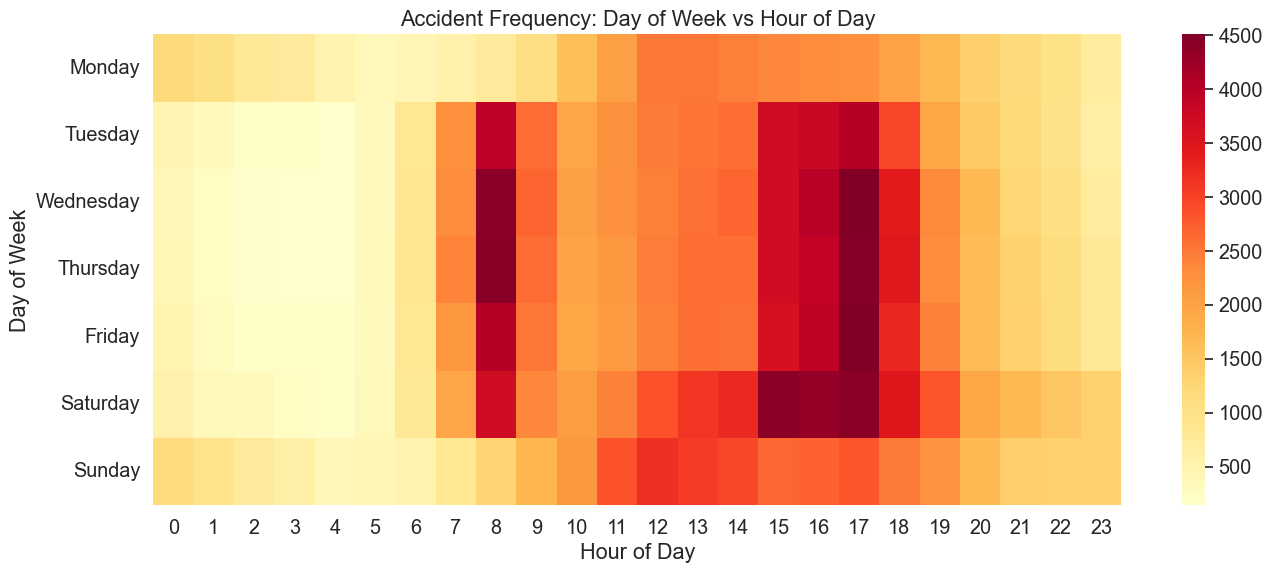

In [40]:
# Day of Week vs. Hour of Day vs. Accident Count (Heatmap)

# Create a pivot table
HeatmapData = RoadAccidentsData.pivot_table(
    index='Day of Week', 
    columns='Hour', 
    values='Accident Index', 
    aggfunc='count', 
    fill_value=0
)

# Reorder days
DaysOrder = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
HeatmapData = HeatmapData.reindex(DaysOrder)

plt.figure(figsize=(14,6))
sns.heatmap(HeatmapData, cmap='YlOrRd')
plt.title('Accident Frequency: Day of Week vs Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()


In [41]:
# Grouped Summarytable Table
Summarytable = RoadAccidentsData.groupby(['Day of Week','Weather Conditions','Accident Severity']) \
                           ['No of Casualties'].mean().reset_index()

print(Summarytable)


    Day of Week     Weather Conditions Accident Severity  No of Casualties
0        Friday      Fine + high winds             Fatal          2.500000
1        Friday      Fine + high winds           Serious          1.409091
2        Friday      Fine + high winds            Slight          1.273731
3        Friday     Fine no high winds             Fatal          1.670673
4        Friday     Fine no high winds           Serious          1.410251
..          ...                    ...               ...               ...
178   Wednesday  Snowing no high winds           Serious          1.307692
179   Wednesday  Snowing no high winds            Slight          1.290221
180   Wednesday                Unknown             Fatal          1.600000
181   Wednesday                Unknown           Serious          1.200000
182   Wednesday                Unknown            Slight          1.210892

[183 rows x 4 columns]


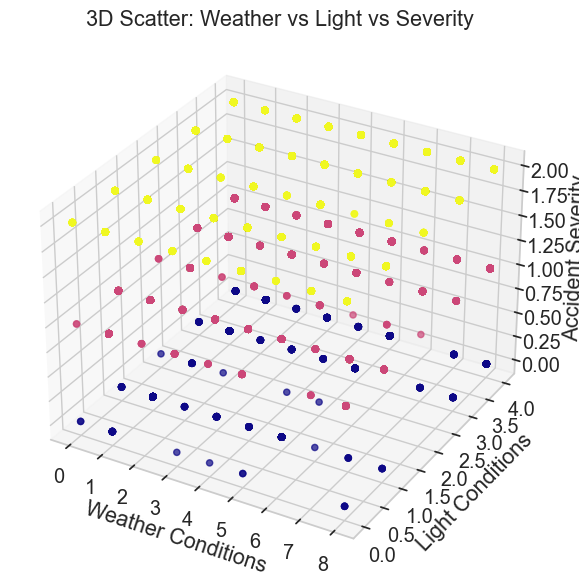

In [42]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# Convert categories to numeric codes
x = RoadAccidentsData['Weather Conditions'].astype('category').cat.codes
y = RoadAccidentsData['Light Conditions'].astype('category').cat.codes
z = RoadAccidentsData['Accident Severity'].astype('category').cat.codes

ax.scatter(x, y, z, c=z, cmap='plasma', alpha=0.7)
ax.set_xlabel('Weather Conditions')
ax.set_ylabel('Light Conditions')
ax.set_zlabel('Accident Severity')
ax.set_title('3D Scatter: Weather vs Light vs Severity')
plt.show()
